In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
from google.colab import files
file = files.upload()

Saving vgames2 (1).csv to vgames2 (1) (1).csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('mode.chained_assignment',  None)

plt.rc('font', family='NanumBarunGothic') 

df = pd.read_csv('vgames2 (1).csv')

#열의 정보
###Name : 게임의 이름
###Platform : 게임이 지원되는 플랫폼의 이름
###Year : 게임이 출시된 연도
###Genre : 게임의 장르
###Publisher : 게임을 제작한 회사
###NA_Sales : 북미 판매량
###EU_Sales : 유럽 판매량
###JP_Sales : 일본 판매량
###Other_Sales : 기타지역 판매량

In [4]:
df.to_csv('game.csv')

In [5]:
df = df.drop('Unnamed: 0', axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df = df.dropna(axis = 0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [9]:
df = df.rename(columns= {'NA_Sales' : '북미', 'EU_Sales': '유럽', 'JP_Sales': '일본', 'Other_Sales': '기타'})

In [10]:
for i in np.arange(0, 16241, 1) :
  if df['Year'].iloc[i] < 20 :
    df['Year'].iloc[i] = df['Year'].iloc[i] + 2000
  elif df['Year'].iloc[i] < 1000 :
    df['Year'].iloc[i] = df['Year'].iloc[i] + 1900
  else :
    df['Year'].iloc[i] = df['Year'].iloc[i]
 

In [11]:
df['북미'] = df['북미'].str.replace('M', '')
df['유럽'] = df['유럽'].str.replace('M', '')
df['일본'] = df['일본'].str.replace('M', '')
df['기타'] = df['기타'].str.replace('M', '')

In [12]:
df['북미'] = df['북미'].str.replace('K', '').astype(float)*0.001
df['유럽'] = df['유럽'].str.replace('K', '').astype(float)*0.001
df['일본'] = df['일본'].str.replace('K', '').astype(float)*0.001
df['기타'] = df['기타'].str.replace('K', '').astype(float)*0.001

In [13]:
df = df.sort_values('Year') #년도 기준으로 정렬.
df = df.reset_index(drop = True) #결측치는 drop했기 때문에 index 순서 다시 정렬.

In [14]:
df['북미'] = df['북미']*10000 #백만 단위로 표시되어서, 소수점이 많기 때문에 발표를 듣는 사람들을 고려하여 백단위로 변경함
df['유럽'] = df['유럽']*10000
df['일본'] = df['일본']*10000
df['기타'] = df['기타']*10000

In [15]:
df

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
0,Boxing,2600,1980.0,Fighting,Activision,7.2,0.4,0.0,0.1
1,Asteroids,2600,1980.0,Shooter,Atari,40.0,2.6,0.0,0.5
2,Missile Command,2600,1980.0,Shooter,Atari,25.6,1.7,0.0,0.3
3,Bridge,2600,1980.0,Misc,Activision,2.5,0.2,0.0,0.0
4,Freeway,2600,1980.0,Action,Activision,3.2,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016.0,Sports,Konami Digital Entertainment,0.0,0.0,1.1,0.0
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.3,0.0
16238,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.1,0.0
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.1,0.0


In [16]:
df['Publisher'].value_counts()

Electronic Arts                 1332
Activision                       963
Namco Bandai Games               924
Ubisoft                          913
Konami Digital Entertainment     821
                                ... 
New World Computing                1
Starpath Corp.                     1
Kids Station                       1
Valve                              1
Seventh Chord                      1
Name: Publisher, Length: 575, dtype: int64

In [17]:
df['Platform'].value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [18]:
df['Year'].value_counts()

2009.0    1428
2008.0    1423
2010.0    1253
2007.0    1195
2011.0    1133
2006.0    1005
2005.0     934
2002.0     826
2003.0     774
2004.0     740
2012.0     652
2015.0     611
2014.0     580
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     342
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [19]:
N = df['북미'].sum() #총 합 계산
E = df['유럽'].sum()
J = df['일본'].sum()
O = df['기타'].sum()

In [20]:
print('북미 게임 판매량' , N) 
print('유럽 게임 판매량' , E)
print('일본 게임 판매량' , J)
print('기타 게임 판매량' , O)


북미 게임 판매량 355657.5
유럽 게임 판매량 175184.3
일본 게임 판매량 88837.70000000001
기타 게임 판매량 45496.0


In [21]:
T = (N + E + J + O) 
T #시장 전체 규모(총 누적 판매량)

665175.5

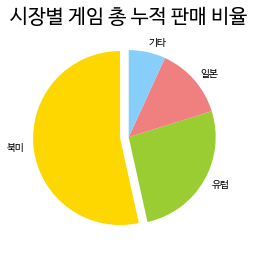

북미 시장 점유율 53.468220041177105 %
유럽 시장 점유율 26.336553285561475 %
일본 시장 점유율 13.35552797720301 %
기타 시장 점유율 6.839698696058409 %


In [22]:
labels = ['북미', '유럽', '일본', '기타']
ratio = [N/T, E/T, J/T, O/T]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.0, 0.0, 0.0)

plt.pie(ratio, explode = explode, labels= labels, colors = colors, startangle=90)
plt.title('시장별 게임 총 누적 판매 비율', fontsize = 20)
plt.show();

print('북미 시장 점유율', N/T*100,'%')
print('유럽 시장 점유율', E/T*100,'%')
print('일본 시장 점유율', J/T*100,'%')
print('기타 시장 점유율', O/T*100,'%')

#지역별 판매량에 따른 변수들(Numerical data)
###지역별 판매량 / 장르 : GS
###지역별 판매량 / 출시년도 : YS
###지역별 판매량 / 플랫폼 : PS 
###지역별 판매량 / 제작사 : CS

#출시년도에 따른 변수들(Categorical data)
###출시년도 / 장르 : YG
###출시년도 / 플랫폼 : YP
###출시년도 / 제작사 : YC

#제작사에 따른 변수들(Catrgorical data / 중복 데이터 제거)
###제작사 / 장르 : CG
###제작사 / 플랫폼 : CP

#장르에 따른 변수(Categorical data / 중복 데이터 제거)
###장르 / 플랫폼 : GP


In [23]:
GNS = df.groupby('Genre').북미.sum() #장르별 북미 판매량
GES = df.groupby('Genre').유럽.sum() #장르별 유럽 판매량
GJS = df.groupby('Genre').일본.sum() #장르별 일본 판매량
GOS = df.groupby('Genre').기타.sum() #장르별 기타 판매량

In [24]:
GS = pd.DataFrame(GNS)
GS['유럽'] = GES
GS['일본'] = GJS
GS['기타'] = GOS
GS #지역에 따른 장르별 판매량

,북미,유럽,일본,기타
Genre,,,,
Action,78817.2,47294.2,13254.3,10930.8
Adventure,3715.2,2035.2,1118.1,966.2
Fighting,10295.4,14885.1,2669.6,1760.1
Misc,41509.7,23460.1,3339.5,2025.1
Platform,37520.7,14893.4,3403.2,3911.1
Puzzle,1915.1,1004.2,562.4,124.4
Racing,58392.1,8643.9,3160.6,4161.7
Role-Playing,15275.5,2130.6,41691.0,7860.0
Shooter,32218.3,36468.9,781.4,4415.2


In [25]:
북미판매 = df.groupby('Year').북미.sum()
유럽판매 = df.groupby('Year').유럽.sum()
일본판매 = df.groupby('Year').일본.sum()
기타판매 = df.groupby('Year').기타.sum()

In [26]:
YS = pd.DataFrame(북미판매) #Year Sale
YS = YS.merge(유럽판매, how = 'inner', on = 'Year')
YS = YS.merge(일본판매, how = 'inner', on = 'Year')
YS = YS.merge(기타판매, how = 'inner', on = 'Year')
YS

,북미,유럽,일본,기타
Year,,,,
1980.0,101.3,6.4,0.0,1.1
1981.0,334.0,1118.5,0.0,3.2
1982.0,269.2,16.5,0.0,3.1
1983.0,77.6,8.0,81.0,1.4
1984.0,332.8,21.0,142.7,7.0
1985.0,337.3,47.4,145.6,9.2
1986.0,125.0,28.4,198.1,19.3
1987.0,84.6,14.1,116.3,2.0
1988.0,238.7,65.9,157.6,1908.0


In [27]:
PNS = df.groupby('Platform').북미.sum()
PES = df.groupby('Platform').유럽.sum()
PJS = df.groupby('Platform').일본.sum()
POS = df.groupby('Platform').기타.sum()

In [29]:
PS = pd.DataFrame(PNS)
PS['유럽'] = PES
PS['일본'] = PJS
PS['기타'] = POS
PS #게임 플랫폼에 따른 지역별 판매량

,북미,유럽,일본,기타
Platform,,,,
2600,803.2,1147.2,0.0,8.3
3DO,0.0,0.0,1.0,0.0
3DS,728.6,3939.0,3027.5,317.4
DC,54.3,16.9,85.6,2.7
DS,37745.4,2939.5,2948.5,1601.4
GB,1136.4,475.1,851.2,81.6
GBA,49534.8,1323.7,465.6,175.0
GC,2516.2,1881.2,508.7,350.8
GEN,192.7,55.2,2624.1,8.9


In [30]:
PS.sort_values(by = '북미')

,북미,유럽,일본,기타
Platform,,,,
WS,0.0,0.0,14.2,0.0
3DO,0.0,0.0,1.0,0.0
TG16,0.0,0.0,1.6,0.0
GG,0.0,0.0,0.4,0.0
PCFX,0.0,0.0,0.3,0.0
NG,0.0,0.0,14.4,0.0
SCD,10.0,3.6,4.5,0.5
DC,54.3,16.9,85.6,2.7
GEN,192.7,55.2,2624.1,8.9


In [31]:
PS.shape

(31, 4)

In [32]:
PSN5 = PS.sort_values(by = '북미')[26:] #상위 5개의 플랫폼 추출
PSE5 = PS.sort_values(by = '유럽')[26:] #상위 5개의 플랫폼 추출
PSJ5 = PS.sort_values(by = '일본')[26:] #상위 5개의 플랫폼 추출
PSO5 = PS.sort_values(by = '기타')[26:] #상위 5개의 플랫폼 추출


In [34]:
PSE5

,북미,유럽,일본,기타
Platform,,,,
Wii,12943.0,14296.1,3954.6,2982.6
PS,51989.2,18201.4,48943.3,2203.5
PS2,22069.0,18405.2,8034.3,7472.1
X360,34009.7,35146.6,622.4,9837.2
PS3,27556.3,54246.2,3682.7,6699.4


In [35]:
CNS = df.groupby('Publisher').북미.sum()
CES = df.groupby('Publisher').유럽.sum()
CJS = df.groupby('Publisher').일본.sum()
COS = df.groupby('Publisher').기타.sum()

In [36]:
CS = pd.DataFrame(CNS)
CS['유럽'] = CES
CS['일본'] = CJS
CS['기타'] = COS
CS #제작사에 따른 지역별 판매량

,북미,유럽,일본,기타
Publisher,,,,
10TACLE Studios,0.7,0.4,0.0,0.0
1C Company,0.1,0.7,0.0,0.2
20th Century Fox Video Games,18.2,1.0,0.0,0.1
2D Boy,0.0,0.3,0.0,0.1
3DO,64.8,30.4,0.0,6.3
...,...,...,...,...
id Software,0.2,0.0,0.0,0.0
imageepoch Inc.,0.0,0.0,0.4,0.0
inXile Entertainment,0.2,0.6,0.0,0.1


In [129]:
CSN5 = CS.sort_values(by = '북미')[26:] #상위 5개의 플랫폼 추출
CSE5 = CS.sort_values(by = '유럽')[26:] #상위 5개의 플랫폼 추출
CSJ5 = CS.sort_values(by = '일본')[26:] #상위 5개의 플랫폼 추출
CSO5 = CS.sort_values(by = '기타')[26:] #상위 5개의 플랫폼 추출
print('북미지역에서 많이 판매된 게임의 제작사', CSN5.iloc[-1:, 0])

북미지역에서 많이 판매된 게임의 제작사 Publisher
Nintendo    82506.9
Name: 북미, dtype: float64


In [130]:
CSN5 = CSN5[['북미']]
CSE5 = CSE5[['유럽']]
CSJ5 = CSJ5[['일본']]
CSO5 = CSO5[['기타']]

In [131]:
CSN5 = CSN5[544:]
CSE5 = CSE5[544:]
CSJ5 = CSJ5[544:]
CSO5 = CSO5[544:]

In [128]:
print(CSN5)
print(CSE5)
print(CSJ5)
print(CSO5)

Empty DataFrame
Columns: [북미]
Index: []
Empty DataFrame
Columns: [유럽]
Index: []
Empty DataFrame
Columns: [일본]
Index: []
Empty DataFrame
Columns: [기타]
Index: []


In [41]:
CSE5['유럽'].iloc[-1:]

Publisher
Electronic Arts    42722.0
Name: 유럽, dtype: float64

In [42]:
print('북미지역에서 많이 판매된 게임의 제작사', CSN5.iloc[-1:, 0])
print('유럽지역에서 많이 판매된 게임의 제작사', CSE5['유럽'].iloc[-1:])
print('일본지역에서 많이 판매된 게임의 제작사', CSJ5['일본'].iloc[-1:])
print('기타지역에서 많이 판매된 게임의 제작사', CSO5['기타'].iloc[-1:])

북미지역에서 많이 판매된 게임의 제작사 Publisher
Nintendo    82506.9
Name: 북미, dtype: float64
유럽지역에서 많이 판매된 게임의 제작사 Publisher
Electronic Arts    42722.0
Name: 유럽, dtype: float64
일본지역에서 많이 판매된 게임의 제작사 Publisher
SquareSoft    28166.6
Name: 일본, dtype: float64
기타지역에서 많이 판매된 게임의 제작사 Publisher
Electronic Arts    9763.4
Name: 기타, dtype: float64


In [120]:
CS

,북미,유럽,일본,기타
Publisher,,,,
10TACLE Studios,0.7,0.4,0.0,0.0
1C Company,0.1,0.7,0.0,0.2
20th Century Fox Video Games,18.2,1.0,0.0,0.1
2D Boy,0.0,0.3,0.0,0.1
3DO,64.8,30.4,0.0,6.3
...,...,...,...,...
id Software,0.2,0.0,0.0,0.0
imageepoch Inc.,0.0,0.0,0.4,0.0
inXile Entertainment,0.2,0.6,0.0,0.1


In [121]:
CSN = CS.sort_values(by = '북미')
CSE = CS.sort_values(by = '유럽')
CSJ = CS.sort_values(by = '일본')
CSO = CS.sort_values(by = '기타')

In [122]:
CSN5= CSN5[544:]
CSE5= CSE5[544:]
CSJ5= CSJ5[544:]
CSO5= CSO5[544:]

In [123]:
CSN5

,북미
Publisher,


In [124]:
CSN5

,북미
Publisher,


<BarContainer object of 12 artists>

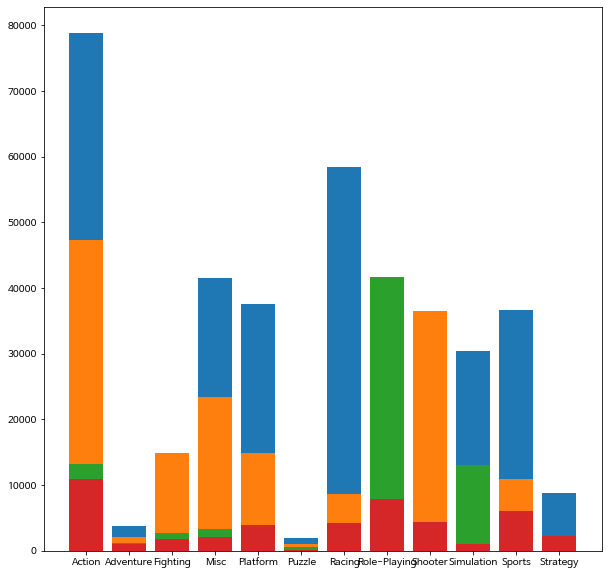

In [48]:
plt.figure(figsize=(10,10))
plt.bar(GS.index, GS['북미'])

plt.bar(GS.index, GS['유럽'])
plt.bar(GS.index, GS['일본'])
plt.bar(GS.index, GS['기타'])

In [49]:
df1 = df.sort_values('북미')[16236:] #게임에 따른 지역별 판매량 상위 5개
df2 = df.sort_values('유럽')[16236:] #게임에 따른 지역별 판매량 상위 5개
df3 = df.sort_values('일본')[16236:] #게임에 따른 지역별 판매량 상위 5개
df4 = df.sort_values('기타')[16236:] #게임에 따른 지역별 판매량 상위 5개
df1

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
14196,Call of Duty: Ghosts,PS4,2013.0,Shooter,Activision,17800.0,14.2,0.5,3.8
7966,Guitar Hero II,X360,2007.0,Misc,Activision,20100.0,0.2,0.0,1.7
1673,Crash Team Racing,PS,1999.0,Racing,Sony Computer Entertainment,25700.0,15.7,4.4,2.1
4109,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,29300.0,12.5,8.3,2.0
1381,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,41000.0,18.9,14.5,1.6


In [50]:
df2

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
7518,Smarty Pants,Wii,2007.0,Misc,Electronic Arts,5.3,7600.0,0.0,1.6
6584,Viva Pinata,X360,2006.0,Simulation,Microsoft Game Studios,4.5,9600.0,0.2,2.0
1989,WWF SmackDown!,PS,2000.0,Fighting,THQ,20.1,13500.0,0.6,1.6
12422,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,44.6,21300.0,0.6,6.9
13660,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,26.4,25600.0,1.6,11.4


In [51]:
df3

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
473,Virtua Racing,GEN,1994.0,Racing,Sega,0.0,0.0,2600.0,0.0
14036,Kirby's Dream Collection: Special Edition,Wii,2012.0,Action,Nintendo,3.4,0.0,3300.0,0.2
737,Resident Evil Director's Cut,PS,1996.0,Action,Virgin Interactive,18.2,12.4,4700.0,2.5
1161,Densha De Go!,PS,1997.0,Simulation,Taito,0.0,0.0,10200.0,0.7
2126,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,16.2,7.7,27800.0,1.4


In [52]:
df4

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
8786,Madden NFL 09,PS2,2008.0,Sports,Electronic Arts,12.2,0.0,0.0,2700.0
9309,Saints Row 2,X360,2008.0,Action,THQ,19.4,8.0,0.2,2700.0
14338,Need for Speed Rivals,PS3,2013.0,Racing,Electronic Arts,3.3,7.4,0.5,3100.0
10287,Resident Evil 5,X360,2009.0,Action,Capcom,21.1,9.4,1.2,3400.0
15799,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,9.6,20.0,2.1,5600.0


In [54]:
a=pd.get_dummies(df['Genre'])

In [55]:
a

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16236,0,0,0,0,0,0,0,0,0,0,1,0
16237,0,0,0,0,0,0,0,1,0,0,0,0
16238,1,0,0,0,0,0,0,0,0,0,0,0
16239,0,0,0,0,0,0,0,1,0,0,0,0


In [56]:
YG = pd.get_dummies(df['Genre'])
YG=pd.concat([df['Year'], YG], axis = 1) 
YG

,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,0,0,1,0,0,0,0,0,0,0,0,0
1,1980.0,0,0,0,0,0,0,0,0,1,0,0,0
2,1980.0,0,0,0,0,0,0,0,0,1,0,0,0
3,1980.0,0,0,0,1,0,0,0,0,0,0,0,0
4,1980.0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,2016.0,0,0,0,0,0,0,0,0,0,0,1,0
16237,2017.0,0,0,0,0,0,0,0,1,0,0,0,0
16238,2017.0,1,0,0,0,0,0,0,0,0,0,0,0
16239,2017.0,0,0,0,0,0,0,0,1,0,0,0,0


In [57]:
YG = YG.groupby('Year').sum()
YG

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1981.0,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
1982.0,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0
1983.0,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1984.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0
1985.0,2.0,0.0,1.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0
1986.0,6.0,0.0,0.0,0.0,6.0,0.0,1.0,1.0,4.0,0.0,3.0,0.0
1987.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,4.0,0.0
1988.0,2.0,0.0,0.0,0.0,4.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0


In [58]:
YP = pd.get_dummies(df['Platform'])
YP=pd.concat([df['Year'], YP], axis = 1) 
YP

,Year,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1980.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1980.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1980.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1980.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,2016.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16237,2017.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16238,2017.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
16239,2017.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
YP = YP.groupby('Year').sum()
YP

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
YC = pd.get_dummies(df['Publisher'])
YC=pd.concat([df['Year'], YC], axis = 1) 
YC

,Year,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,989 Studios,AQ Interactive,ASC Games,ASCII Entertainment,ASCII Media Works,ASK,Abylight,Acclaim Entertainment,Accolade,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Adeline Software,Aerosoft,Agatsuma Entertainment,Agetec,Aksys Games,Alawar Entertainment,Alchemist,Alternative Software,Altron,Alvion,American Softworks,Angel Studios,Answer Software,Aqua Plus,Aques,...,Victor Interactive,Video System,Views,Vir2L Studios,Virgin Interactive,Virtual Play Games,Visco,Vivendi Games,Wanadoo,Warashi,Wargaming.net,Warner Bros. Interactive Entertainment,Warp,WayForward Technologies,Westwood Studios,White Park Bay Software,Wizard Video Games,XS Games,Xicat Interactive,Xing Entertainment,Xplosiv,Xseed Games,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
0,1980.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1980.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1980.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1980.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1980.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,2016.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16237,2017.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16238,2017.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16239,2017.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
YC = YC.groupby('Year').sum()
YC

,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,989 Studios,AQ Interactive,ASC Games,ASCII Entertainment,ASCII Media Works,ASK,Abylight,Acclaim Entertainment,Accolade,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Adeline Software,Aerosoft,Agatsuma Entertainment,Agetec,Aksys Games,Alawar Entertainment,Alchemist,Alternative Software,Altron,Alvion,American Softworks,Angel Studios,Answer Software,Aqua Plus,Aques,Arc System Works,...,Victor Interactive,Video System,Views,Vir2L Studios,Virgin Interactive,Virtual Play Games,Visco,Vivendi Games,Wanadoo,Warashi,Wargaming.net,Warner Bros. Interactive Entertainment,Warp,WayForward Technologies,Westwood Studios,White Park Bay Software,Wizard Video Games,XS Games,Xicat Interactive,Xing Entertainment,Xplosiv,Xseed Games,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1984.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1988.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
CG = pd.get_dummies(df['Genre'])
CG=pd.concat([df['Publisher'], CG], axis = 1) 
CG

,Publisher,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Activision,0,0,1,0,0,0,0,0,0,0,0,0
1,Atari,0,0,0,0,0,0,0,0,1,0,0,0
2,Atari,0,0,0,0,0,0,0,0,1,0,0,0
3,Activision,0,0,0,1,0,0,0,0,0,0,0,0
4,Activision,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,Konami Digital Entertainment,0,0,0,0,0,0,0,0,0,0,1,0
16237,Sega,0,0,0,0,0,0,0,1,0,0,0,0
16238,Idea Factory,1,0,0,0,0,0,0,0,0,0,0,0
16239,Sega,0,0,0,0,0,0,0,1,0,0,0,0


In [63]:
CG = CG.groupby('Publisher').sum()
CG

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
10TACLE Studios,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1C Company,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
20th Century Fox Video Games,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2D Boy,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3DO,17.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
id Software,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
imageepoch Inc.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
inXile Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
CP = pd.get_dummies(df['Platform'])
CP=pd.concat([df['Publisher'], CP], axis = 1) 
CP

,Publisher,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,Activision,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Atari,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Atari,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Activision,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Activision,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,Konami Digital Entertainment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16237,Sega,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16238,Idea Factory,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
16239,Sega,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [65]:
CP = CP.groupby('Publisher').sum()
CP

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Publisher,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10TACLE Studios,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1C Company,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20th Century Fox Video Games,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2D Boy,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3DO,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,16,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id Software,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
imageepoch Inc.,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
inXile Entertainment,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
GP = pd.get_dummies(df['Platform'])
GP=pd.concat([df['Genre'], GP], axis = 1) 
GP

,Genre,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,Fighting,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Shooter,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Shooter,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Misc,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,Sports,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16237,Role-Playing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16238,Action,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
16239,Role-Playing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [67]:
GP = GP.groupby('Genre').sum()
GP

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,55.0,0.0,180.0,3.0,335.0,6.0,162.0,98.0,3.0,0.0,36.0,13.0,0.0,160.0,0.0,153.0,344.0,369.0,121.0,216.0,141.0,3.0,0.0,12.0,0.0,0.0,229.0,63.0,318.0,152.0,68.0
Adventure,1.0,1.0,36.0,11.0,237.0,5.0,35.0,20.0,2.0,0.0,4.0,1.0,0.0,65.0,0.0,66.0,195.0,72.0,19.0,213.0,84.0,26.0,0.0,4.0,1.0,0.0,83.0,3.0,47.0,26.0,11.0
Fighting,1.0,0.0,14.0,12.0,36.0,0.0,23.0,42.0,5.0,0.0,29.0,4.0,11.0,5.0,0.0,108.0,146.0,76.0,17.0,73.0,16.0,31.0,0.0,25.0,0.0,0.0,41.0,5.0,64.0,44.0,7.0
Misc,5.0,0.0,53.0,0.0,388.0,8.0,86.0,35.0,1.0,0.0,17.0,2.0,0.0,22.0,0.0,76.0,217.0,121.0,15.0,104.0,24.0,15.0,2.0,17.0,0.0,0.0,270.0,21.0,122.0,45.0,15.0
Platform,9.0,0.0,28.0,2.0,89.0,18.0,139.0,73.0,7.0,1.0,30.0,28.0,0.0,11.0,0.0,64.0,101.0,35.0,11.0,35.0,10.0,5.0,1.0,26.0,0.0,0.0,57.0,16.0,24.0,49.0,4.0
Puzzle,8.0,1.0,19.0,0.0,235.0,15.0,39.0,11.0,0.0,0.0,12.0,14.0,0.0,25.0,0.0,32.0,18.0,2.0,1.0,43.0,3.0,5.0,0.0,13.0,0.0,0.0,53.0,4.0,6.0,7.0,0.0
Racing,4.0,0.0,10.0,6.0,66.0,2.0,64.0,60.0,1.0,0.0,56.0,4.0,0.0,56.0,0.0,143.0,212.0,90.0,17.0,65.0,11.0,8.0,1.0,9.0,0.0,0.0,91.0,3.0,100.0,121.0,19.0
Role-Playing,0.0,0.0,84.0,4.0,196.0,21.0,72.0,25.0,3.0,0.0,7.0,11.0,0.0,103.0,1.0,96.0,182.0,117.0,47.0,190.0,82.0,17.0,1.0,50.0,0.0,4.0,35.0,6.0,75.0,23.0,13.0
Shooter,22.0,0.0,6.0,3.0,42.0,1.0,40.0,48.0,1.0,0.0,24.0,7.0,0.0,145.0,0.0,96.0,158.0,155.0,34.0,37.0,5.0,22.0,0.0,10.0,1.0,0.0,60.0,10.0,197.0,123.0,33.0


In [140]:
액션 = GP.iloc[0, 0:].sum()
어드벤처 = GP.iloc[1, 0:].sum()
파이팅 = GP.iloc[2, 0:].sum()
Misc = GP.iloc[3, 0:].sum()
플랫폼 = GP.iloc[4, 0:].sum()
퍼즐 = GP.iloc[5, 0:].sum()
레이싱 = GP.iloc[6, 0:].sum()
롤플레잉 = GP.iloc[7, 0:].sum()
슈팅 = GP.iloc[8, 0:].sum()
시뮬레이션 = GP.iloc[9, 0:].sum()
스포츠 = GP.iloc[10, 0:].sum()
전략 = GP.iloc[11, 0:].sum()

In [159]:
액션1 = GP.iloc[0, 0:].sum()  / GP.sum().sum()
어드벤처1 = GP.iloc[1, 0:].sum() / GP.sum().sum()
파이트1 = GP.iloc[2, 0:].sum() / GP.sum().sum()
Misc1 = GP.iloc[3, 0:].sum() / GP.sum().sum()
플랫폼1 = GP.iloc[4, 0:].sum() / GP.sum().sum()
퍼즐1 = GP.iloc[5, 0:].sum() / GP.sum().sum()
레이싱1 = GP.iloc[6, 0:].sum() / GP.sum().sum()
롤플레잉1 = GP.iloc[7, 0:].sum() / GP.sum().sum()
슈팅1 = GP.iloc[8, 0:].sum() / GP.sum().sum()
시뮬레이션1 = GP.iloc[9, 0:].sum() / GP.sum().sum()
스포츠1 = GP.iloc[10, 0:].sum() / GP.sum().sum()
전략1 = GP.iloc[11, 0:].sum() / GP.sum().sum()

In [161]:
print(액션1*100)
print(어드벤처1*100)
print(파이트1*100)
print(Misc1*100)
print(플랫폼1*100)
print(퍼즐1*100)
print(레이싱1*100)
print(롤플레잉1*100)
print(슈팅1*100)
print(시뮬레이션1*100)
print(스포츠1*100)
print(전략1*100)


19.949510498122038
7.80740102210455
5.141309032695031
10.350347884982451
5.375284773105104
3.4850070808447757
7.505695462102087
9.020380518440984
7.88128809802352
5.209038852287421
14.155532294809433
4.119204482482606


In [164]:
액션2 = GS.iloc[0, 0:].sum()  / GS.sum().sum()
어드벤처2 = GS.iloc[1, 0:].sum() / GS.sum().sum()
파이트2 = GS.iloc[2, 0:].sum() / GS.sum().sum()
Misc2 = GS.iloc[3, 0:].sum() / GS.sum().sum()
플랫폼2 = GS.iloc[4, 0:].sum() / GS.sum().sum()
퍼즐2 = GS.iloc[5, 0:].sum() / GS.sum().sum()
레이싱2 = GS.iloc[6, 0:].sum() / GS.sum().sum()
롤플레잉2 = GS.iloc[7, 0:].sum() / GS.sum().sum()
슈팅2 = GS.iloc[8, 0:].sum() / GS.sum().sum()
시뮬레이션2 = GS.iloc[9, 0:].sum() / GS.sum().sum()
스포츠2 = GS.iloc[10, 0:].sum() / GS.sum().sum()
전략2 = GS.iloc[11, 0:].sum() / GS.sum().sum()

In [165]:
print(액션2*100)
print(어드벤처2*100)
print(파이트2*100)
print(Misc2*100)
print(플랫폼2*100)
print(퍼즐2*100)
print(레이싱2*100)
print(롤플레잉2*100)
print(슈팅2*100)
print(시뮬레이션2*100)
print(스포츠2*100)
print(전략2*100)


22.595014398455774
1.177839532574486
4.4514868632413584
10.573810971690934
8.979344548919775
0.5421276039180636
11.178749066975545
10.066080305122473
11.107414509403913
8.530064622043358
8.615636023876414
2.1824315537779126


In [163]:
GS['북미'] / GS.sum().sum() colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

665175.5

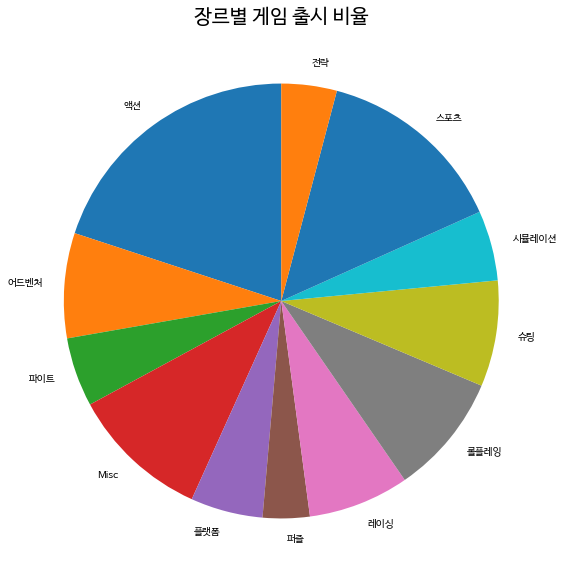

19.949510498122038
7.80740102210455
5.141309032695031
10.350347884982451
5.375284773105104
3.4850070808447757
7.505695462102087
9.020380518440984
7.88128809802352
5.209038852287421
14.155532294809433
4.119204482482606


In [171]:
labels = ['액션', '어드벤처', '파이트', 'Misc', '플랫폼', '퍼즐', '레이싱', '롤플레잉', '슈팅', '시뮬레이션', '스포츠', '전략']
ratio = [액션1, 어드벤처1, 파이트1, Misc1, 플랫폼1, 퍼즐1, 레이싱1, 롤플레잉1, 슈팅1, 시뮬레이션1, 스포츠1, 전략1]

plt.figure(figsize=(10,10))
plt.pie(ratio, labels= labels, startangle=90)
plt.title('장르별 게임 출시 비율', fontsize = 20)
plt.show();

print(액션1*100)
print(어드벤처1*100)
print(파이트1*100)
print(Misc1*100)
print(플랫폼1*100)
print(퍼즐1*100)
print(레이싱1*100)
print(롤플레잉1*100)
print(슈팅1*100)
print(시뮬레이션1*100)
print(스포츠1*100)
print(전략1*100)


In [218]:
a = ['장르별 판매 비율']
ratio = np.array([액션2, 어드벤처2, 파이트2, Misc2, 플랫폼2, 퍼즐2, 레이싱2, 롤플레잉2, 슈팅2, 시뮬레이션2, 스포츠2, 전략2])
ratio2 = np.array([액션1, 어드벤처1, 파이트1, Misc1, 플랫폼1, 퍼즐1, 레이싱1, 롤플레잉1, 슈팅1, 시뮬레이션1, 스포츠1, 전략1])
genre = ['액션', '어드벤처', '파이트', 'Misc', '플랫폼', '퍼즐', '레이싱', '롤플레잉', '슈팅', '시뮬레이션', '스포츠', '전략']
ratio = pd.DataFrame(ratio, index = genre, columns = a)
ratio['장르 출시 비율'] = ratio2
ratio['차이'] = ratio['장르별 판매 비율'] - ratio['장르 출시 비율']

ratio['장르별 판매 비율'] = ratio['장르별 판매 비율']*100
ratio['장르 출시 비율'] = ratio['장르 출시 비율']*100
ratio['차이'] = ratio['차이']*100
ratio

,장르별 판매 비율,장르 출시 비율,차이
액션,22.595014,19.949510,2.645504
어드벤처,1.177840,7.807401,-6.629561
파이트,4.451487,5.141309,-0.689822
Misc,10.573811,10.350348,0.223463
플랫폼,8.979345,5.375285,3.604060
퍼즐,0.542128,3.485007,-2.942879
레이싱,11.178749,7.505695,3.673054
롤플레잉,10.066080,9.020381,1.045700
슈팅,11.107415,7.881288,3.226126
시뮬레이션,8.530065,5.209039,3.321026


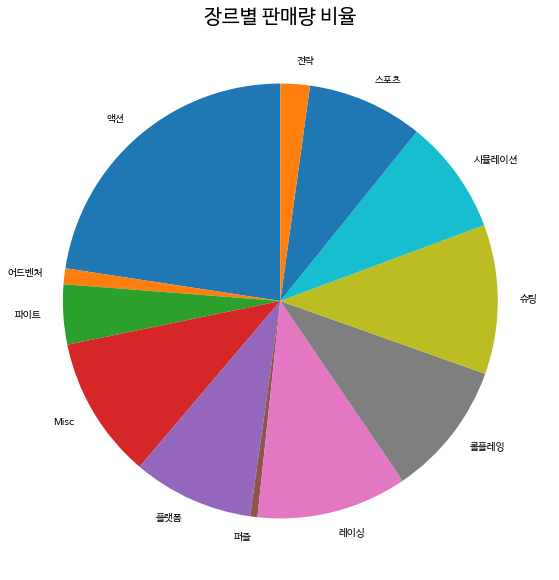

액션 출시 비율 - 판매량 비율: 2.645503900333736
어드벤처 출시 비율 - 판매량 비율: -6.629561489530063
파이트 출시 비율 - 판매량 비율: -0.6898221694536728
Misc 출시 비율 - 판매량 비율: 0.2234630867084828
플랫폼 출시 비율 - 판매량 비율: 3.6040597758146706
퍼즐 출시 비율 - 판매량 비율: -2.942879476926712
레이싱 출시 비율 - 판매량 비율: 3.6730536048734583
롤플레잉 출시 비율 - 판매량 비율: 1.0456997866814888
슈팅 출시 비율 - 판매량 비율: 3.2261264113803936
시뮬레이션 출시 비율 - 판매량 비율: 3.3210257697559378
스포츠 출시 비율 - 판매량 비율: -5.539896270933019
전략 출시 비율 - 판매량 비율: -1.936772928704693


In [177]:
labels = ['액션', '어드벤처', '파이트', 'Misc', '플랫폼', '퍼즐', '레이싱', '롤플레잉', '슈팅', '시뮬레이션', '스포츠', '전략']
ratio = [액션2, 어드벤처2, 파이트2, Misc2, 플랫폼2, 퍼즐2, 레이싱2, 롤플레잉2, 슈팅2, 시뮬레이션2, 스포츠2, 전략2]

plt.figure(figsize=(10,10))
plt.pie(ratio, labels= labels, startangle=90)
plt.title('장르별 판매량 비율', fontsize = 20)
plt.show();

print('액션 출시 비율 - 판매량 비율:',  액션2*100 - 액션1*100)
print('어드벤처 출시 비율 - 판매량 비율:',어드벤처2*100 - 어드벤처1*100)
print('파이트 출시 비율 - 판매량 비율:',파이트2*100 - 파이트1*100)
print('Misc 출시 비율 - 판매량 비율:',Misc2*100 - Misc1*100)
print('플랫폼 출시 비율 - 판매량 비율:',플랫폼2*100 - 플랫폼1*100)
print('퍼즐 출시 비율 - 판매량 비율:',퍼즐2*100 - 퍼즐1*100)
print('레이싱 출시 비율 - 판매량 비율:',레이싱2*100 - 레이싱1*100)
print('롤플레잉 출시 비율 - 판매량 비율:',롤플레잉2*100 - 롤플레잉1*100)
print('슈팅 출시 비율 - 판매량 비율:',슈팅2*100 - 슈팅1*100)
print('시뮬레이션 출시 비율 - 판매량 비율:',시뮬레이션2*100 - 시뮬레이션1*100)
print('스포츠 출시 비율 - 판매량 비율:',스포츠2*100 - 스포츠1*100)
print('전략 출시 비율 - 판매량 비율:',전략2*100 - 전략1*100)


<BarContainer object of 1 artists>

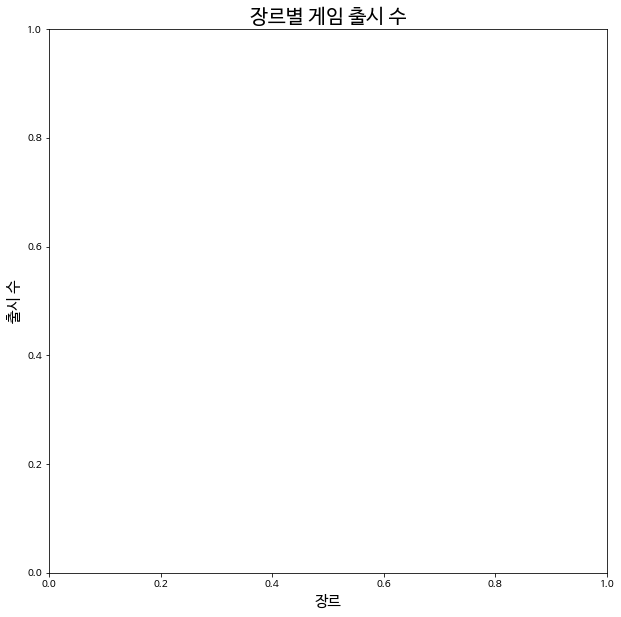

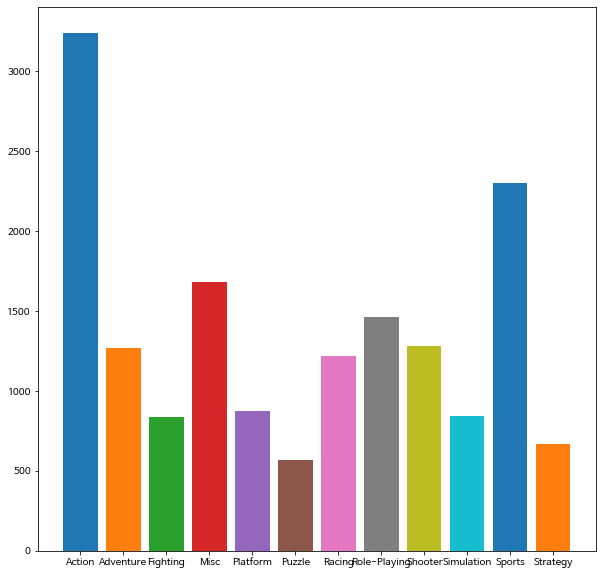

In [170]:
plt.figure(figsize=(10,10))

plt.title('장르별 게임 출시 수', fontsize = 20)
plt.xlabel('장르', fontsize = 15)
plt.ylabel('출시 수', fontsize = 15)

plt.bar(GP.index[0], 액션)
plt.bar(GP.index[1], 어드벤처)
plt.bar(GP.index[2], 파이팅)
plt.bar(GP.index[3], Misc)
plt.bar(GP.index[4], 플랫폼)
plt.bar(GP.index[5], 퍼즐)
plt.bar(GP.index[6], 레이싱)
plt.bar(GP.index[7], 롤플레잉)
plt.bar(GP.index[8], 슈팅)
plt.bar(GP.index[9], 시뮬레이션)
plt.bar(GP.index[10], 스포츠)
plt.bar(GP.index[11], 전략)

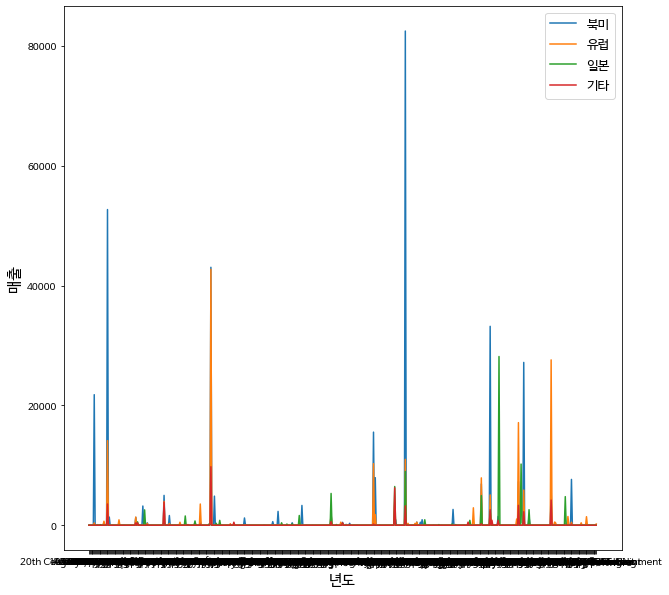

In [68]:
y = CS.index

plt.figure(figsize=(10,10))
plt.plot(y, CS['북미'])
plt.plot(y, CS['유럽'])
plt.plot(y, CS['일본'])
plt.plot(y, CS['기타'])

plt.legend(CS.columns, fontsize = 13)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('매출', fontsize = 15)
plt.show()

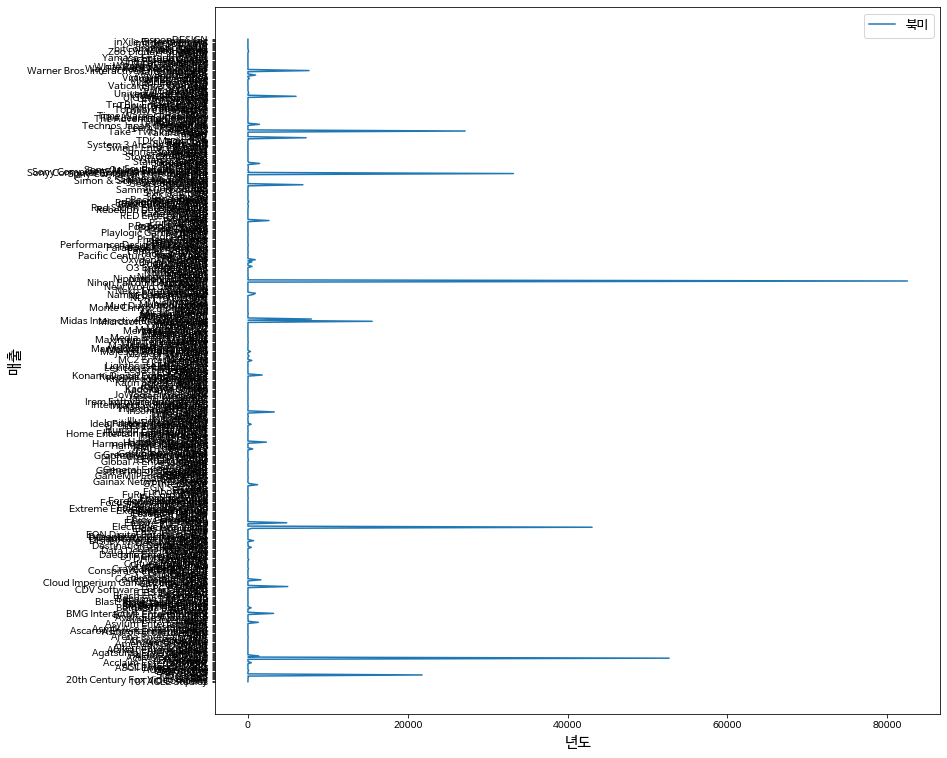

In [69]:
y = CS.index

plt.figure(figsize=(13,13))
plt.plot(CS['북미'], y)


plt.legend(CS.columns, fontsize = 13)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('매출', fontsize = 15)
plt.show()

In [70]:
CS

,북미,유럽,일본,기타
Publisher,,,,
10TACLE Studios,0.7,0.4,0.0,0.0
1C Company,0.1,0.7,0.0,0.2
20th Century Fox Video Games,18.2,1.0,0.0,0.1
2D Boy,0.0,0.3,0.0,0.1
3DO,64.8,30.4,0.0,6.3
...,...,...,...,...
id Software,0.2,0.0,0.0,0.0
imageepoch Inc.,0.0,0.0,0.4,0.0
inXile Entertainment,0.2,0.6,0.0,0.1


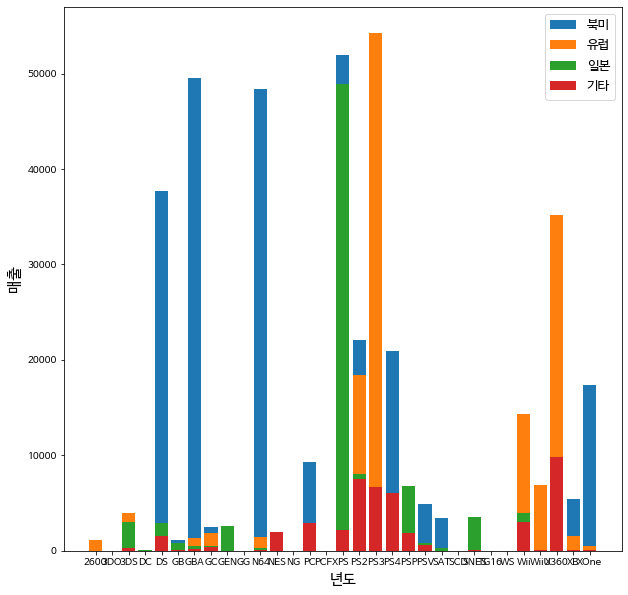

In [71]:
y = PS.index

plt.figure(figsize=(10,10))
plt.bar(y, PS['북미'])
plt.bar(y, PS['유럽'])
plt.bar(y, PS['일본'])
plt.bar(y, PS['기타'])

plt.legend(PS.columns, fontsize = 13)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('매출', fontsize = 15)
plt.show()

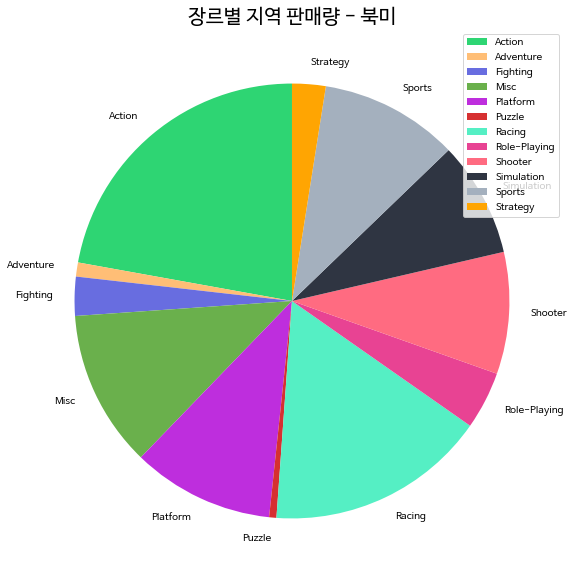

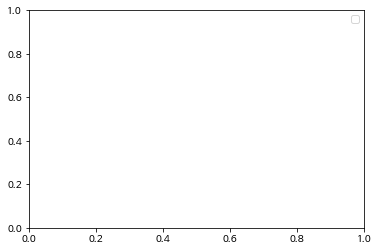

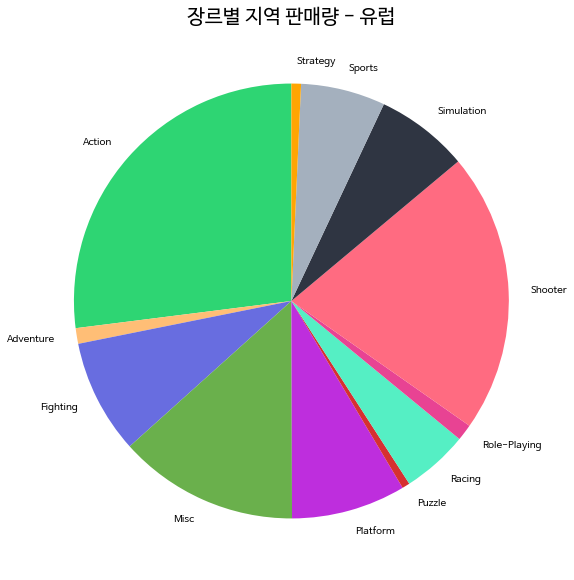

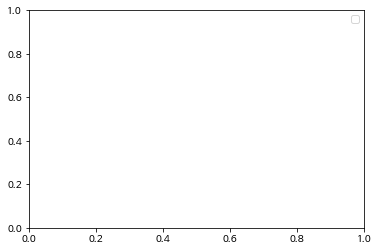

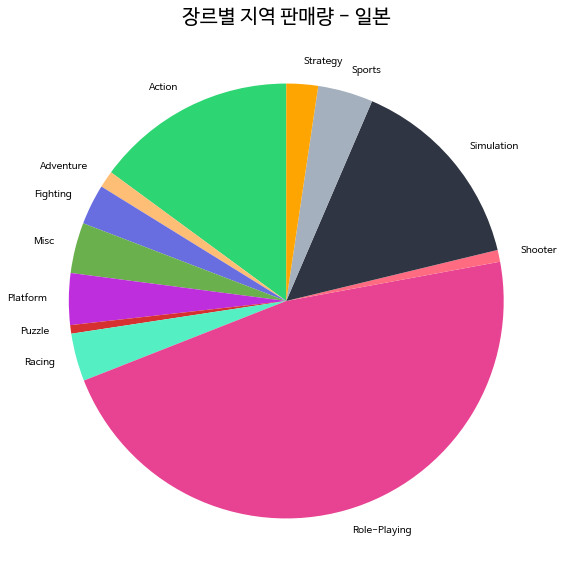

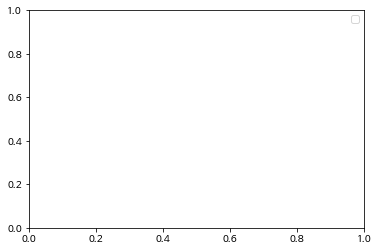

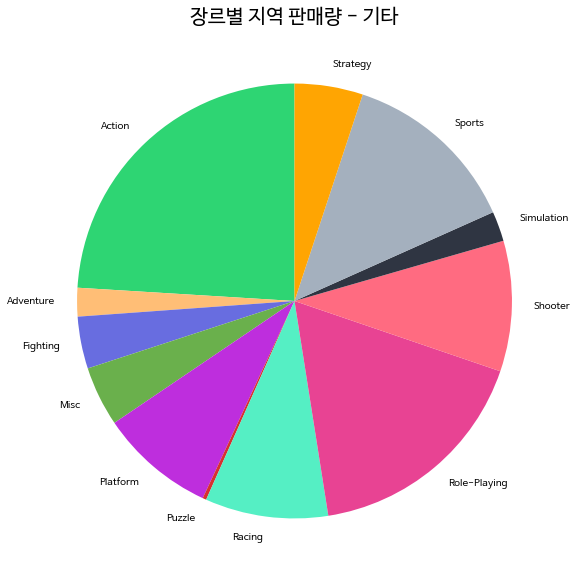

In [72]:
labels = GS.index
ratio = [N/T, E/T, J/T, O/T]
colors = ['#2ed573', '#ffbe76', '#686de0', '#6ab04c', '#be2edd', '#d63031', '#55efc4', '#e84393', '#ff6b81', '#2f3542', '#a4b0be', '#ffa502']


plt.rc('figure', titlesize=10)

plt.figure(figsize=(10,10))
plt.pie(GS['북미'], labels= labels, startangle=90, colors= colors)
plt.legend(GS.index)
plt.title('장르별 지역 판매량 - 북미', fontsize = 20)
plt.show();

plt.legend(GS.index)
plt.figure(figsize=(10,10))
plt.pie(GS['유럽'], labels= labels, startangle=90, colors= colors)
plt.title('장르별 지역 판매량 - 유럽', fontsize = 20)
plt.show();
plt.legend(GS.index)
plt.figure(figsize=(10,10))
plt.pie(GS['일본'], labels= labels, startangle=90, colors= colors)
plt.title('장르별 지역 판매량 - 일본', fontsize = 20)
plt.show();
plt.legend(GS.index)
plt.figure(figsize=(10,10))
plt.pie(GS['기타'], labels= labels, startangle=90, colors= colors)
plt.title('장르별 지역 판매량 - 기타', fontsize = 20)
plt.show();


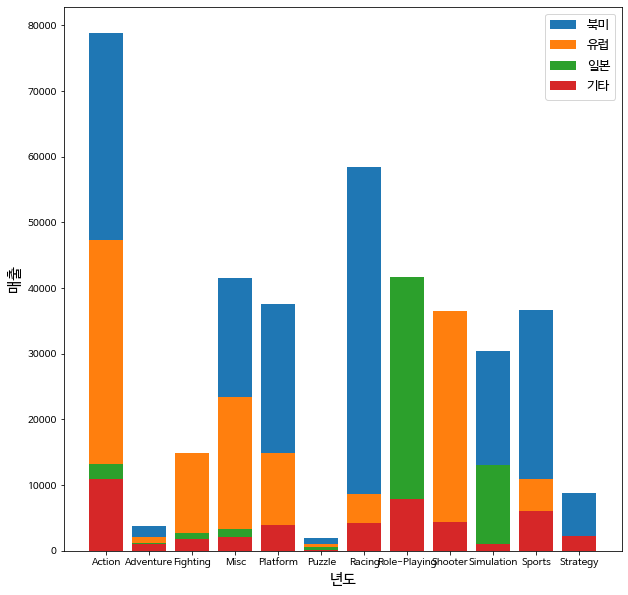

In [73]:
y = GS.index

plt.figure(figsize=(10,10))
plt.bar(y, GS['북미'])
plt.bar(y, GS['유럽'])
plt.bar(y, GS['일본'])
plt.bar(y, GS['기타'])

plt.legend(GS.columns, fontsize = 13)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('매출', fontsize = 15)
plt.show()

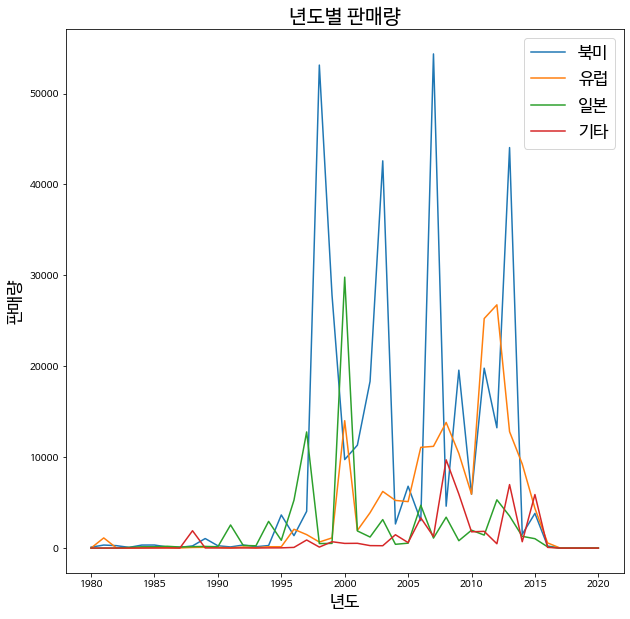

In [74]:
y = YS.index

plt.figure(figsize=(10,10))
plt.plot(y, YS['북미'])
plt.plot(y, YS['유럽'])
plt.plot(y, YS['일본'])
plt.plot(y, YS['기타'])

plt.legend(YS.columns, fontsize = 17)
plt.xlabel('년도', fontsize = 17)
plt.ylabel('판매량', fontsize = 17)
plt.title('년도별 판매량', fontsize = 20)
plt.show()

In [75]:
YG.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object')

In [76]:
GP.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
2600,55.0,1.0,1.0,5.0,9.0,8.0,4.0,0.0,22.0,1.0,9.0,0.0
3DO,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3DS,180.0,36.0,14.0,53.0,28.0,19.0,10.0,84.0,6.0,28.0,25.0,15.0
DC,3.0,11.0,12.0,0.0,2.0,0.0,6.0,4.0,3.0,1.0,10.0,0.0
DS,335.0,237.0,36.0,388.0,89.0,235.0,66.0,196.0,42.0,279.0,146.0,78.0
GB,6.0,5.0,0.0,8.0,18.0,15.0,2.0,21.0,1.0,5.0,9.0,7.0
GBA,162.0,35.0,23.0,86.0,139.0,39.0,64.0,72.0,40.0,18.0,88.0,18.0
GC,98.0,20.0,42.0,35.0,73.0,11.0,60.0,25.0,48.0,12.0,106.0,11.0
GEN,3.0,2.0,5.0,1.0,7.0,0.0,1.0,3.0,1.0,0.0,3.0,1.0
GG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


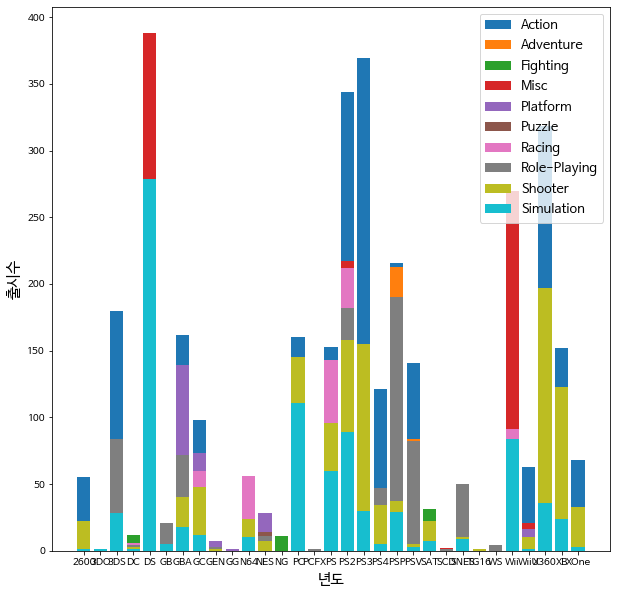

In [77]:
x = GP.T.index

plt.figure(figsize=(10,10))
plt.bar(x, GP.T['Action'])
plt.bar(x, GP.T['Adventure'])
plt.bar(x, GP.T['Fighting'])
plt.bar(x, GP.T['Misc'])
plt.bar(x, GP.T['Platform'])
plt.bar(x, GP.T['Puzzle'])
plt.bar(x, GP.T['Racing'])
plt.bar(x, GP.T['Role-Playing'])
plt.bar(x, GP.T['Shooter'])
plt.bar(x, GP.T['Simulation'])

plt.legend(GP.T.columns, fontsize = 13)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('출시수', fontsize = 15)
plt.show()

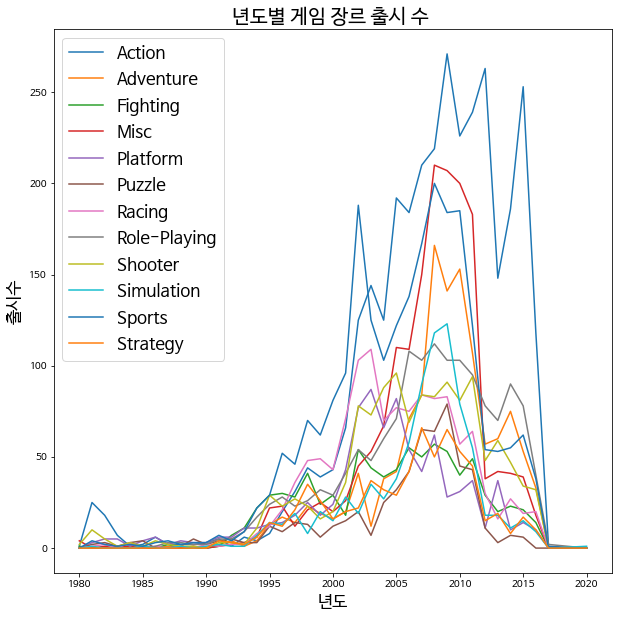

In [78]:
x = YG.index

plt.figure(figsize=(10,10))
plt.plot(x, YG['Action'])
plt.plot(x, YG['Adventure'])
plt.plot(x, YG['Fighting'])
plt.plot(x, YG['Misc'])
plt.plot(x, YG['Platform'])
plt.plot(x, YG['Puzzle'])
plt.plot(x, YG['Racing'])
plt.plot(x, YG['Role-Playing'])
plt.plot(x, YG['Shooter'])
plt.plot(x, YG['Simulation'])
plt.plot(x, YG['Sports'])
plt.plot(x, YG['Strategy'])


plt.legend(YG.columns, fontsize = 17)
plt.xlabel('년도', fontsize = 17)
plt.ylabel('출시수', fontsize = 17)
plt.title('년도별 게임 장르 출시 수 ', fontsize = 20)
plt.show()

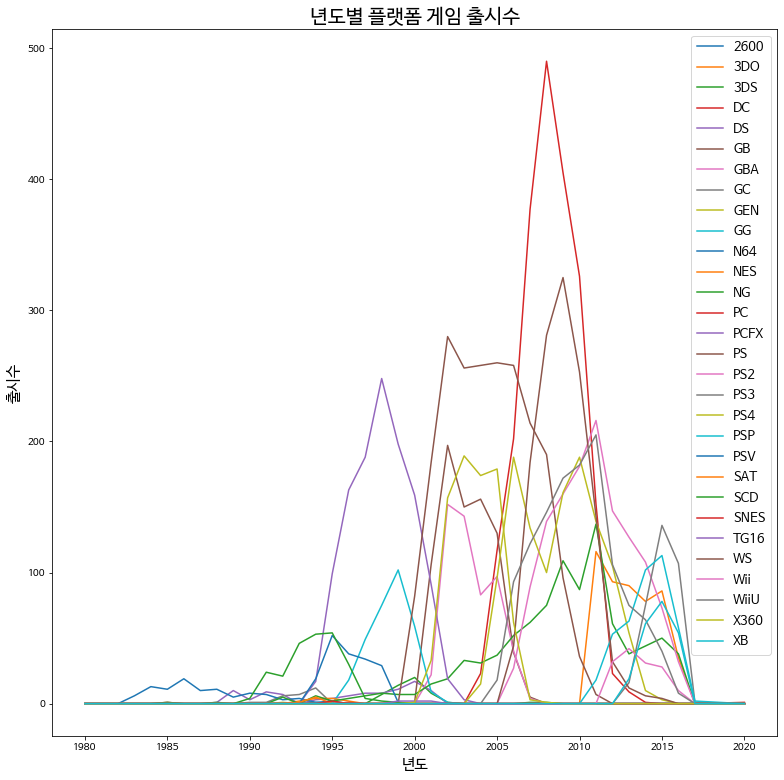

In [80]:
x1 = YP.index
plt.figure(figsize=(13,13))

plt.plot(x1, YP[YP.columns[1]])
plt.plot(x1, YP[YP.columns[2]])
plt.plot(x1, YP[YP.columns[3]])
plt.plot(x1, YP[YP.columns[4]])
plt.plot(x1, YP[YP.columns[5]])
plt.plot(x1, YP[YP.columns[6]])
plt.plot(x1, YP[YP.columns[7]])
plt.plot(x1, YP[YP.columns[8]])
plt.plot(x1, YP[YP.columns[9]])
plt.plot(x1, YP[YP.columns[10]])
plt.plot(x1, YP[YP.columns[11]])
plt.plot(x1, YP[YP.columns[12]])
plt.plot(x1, YP[YP.columns[13]])
plt.plot(x1, YP[YP.columns[14]])
plt.plot(x1, YP[YP.columns[15]])
plt.plot(x1, YP[YP.columns[16]])
plt.plot(x1, YP[YP.columns[17]])
plt.plot(x1, YP[YP.columns[18]])
plt.plot(x1, YP[YP.columns[19]])
plt.plot(x1, YP[YP.columns[20]])
plt.plot(x1, YP[YP.columns[21]])
plt.plot(x1, YP[YP.columns[22]])
plt.plot(x1, YP[YP.columns[23]])
plt.plot(x1, YP[YP.columns[24]])
plt.plot(x1, YP[YP.columns[25]])
plt.plot(x1, YP[YP.columns[26]])
plt.plot(x1, YP[YP.columns[27]])
plt.plot(x1, YP[YP.columns[28]])
plt.plot(x1, YP[YP.columns[29]])
plt.plot(x1, YP[YP.columns[30]])

plt.legend(YP.columns, fontsize = 13)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('출시수', fontsize = 15)
plt.title('년도별 플랫폼 게임 출시수', fontsize = 20)
plt.show()

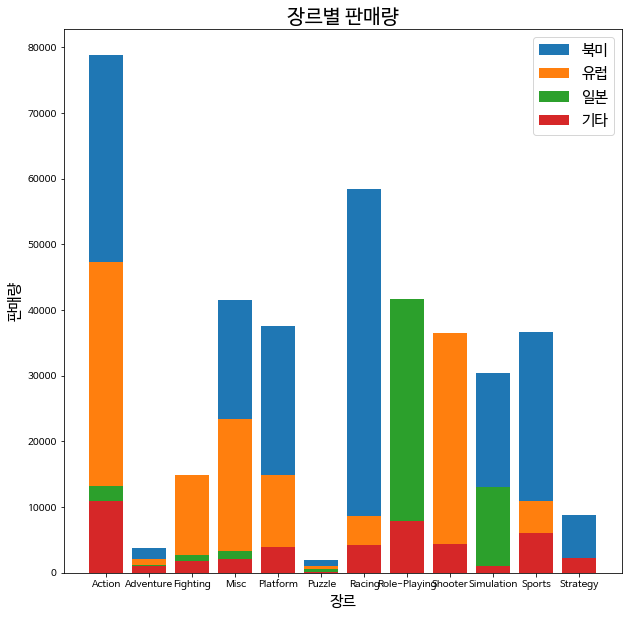

In [81]:
y = GS.index

plt.figure(figsize=(10,10))
plt.bar(y, GS['북미'])
plt.bar(y, GS['유럽'])
plt.bar(y, GS['일본'])
plt.bar(y, GS['기타'])


plt.legend(GS.columns, fontsize = 15)
plt.xlabel('장르', fontsize = 15)
plt.ylabel('판매량', fontsize = 15)
plt.title('장르별 판매량', fontsize = 20)
plt.show()

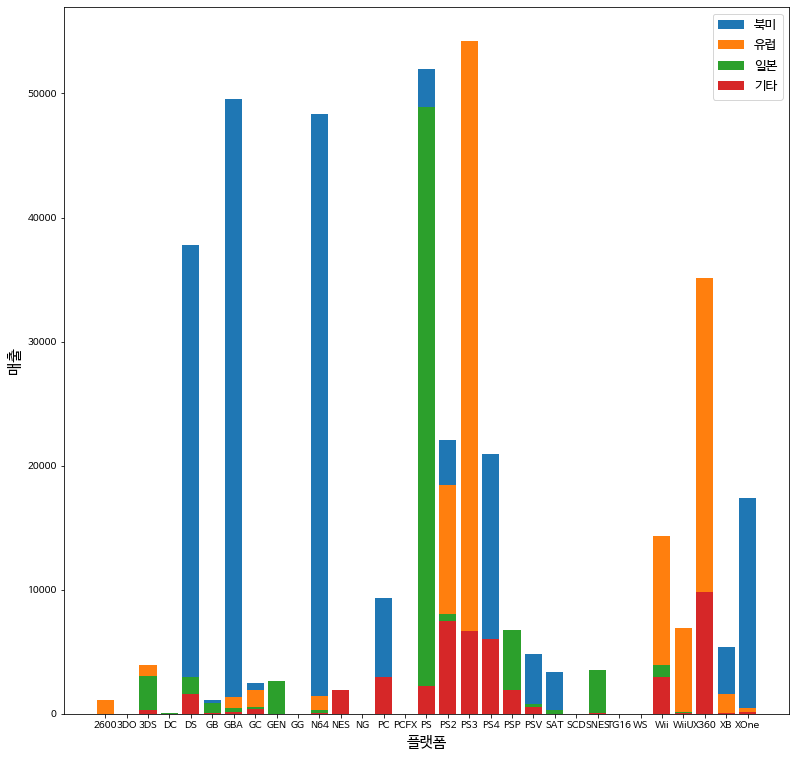

In [82]:
y = PS.index

plt.figure(figsize=(13,13))
plt.bar(y, PS['북미'])
plt.bar(y, PS['유럽'])
plt.bar(y, PS['일본'])
plt.bar(y, PS['기타'])


plt.legend(PS.columns, fontsize = 13)
plt.xlabel('플랫폼', fontsize = 15)
plt.ylabel('매출', fontsize = 15)
plt.show()

In [83]:
df

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
0,Boxing,2600,1980.0,Fighting,Activision,7.2,0.4,0.0,0.1
1,Asteroids,2600,1980.0,Shooter,Atari,40.0,2.6,0.0,0.5
2,Missile Command,2600,1980.0,Shooter,Atari,25.6,1.7,0.0,0.3
3,Bridge,2600,1980.0,Misc,Activision,2.5,0.2,0.0,0.0
4,Freeway,2600,1980.0,Action,Activision,3.2,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016.0,Sports,Konami Digital Entertainment,0.0,0.0,1.1,0.0
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.3,0.0
16238,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.1,0.0
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.1,0.0


In [99]:
GS1 = GS[['북미', '유럽']]
GS1

,북미,유럽
Genre,,
Action,78817.2,47294.2
Adventure,3715.2,2035.2
Fighting,10295.4,14885.1
Misc,41509.7,23460.1
Platform,37520.7,14893.4
Puzzle,1915.1,1004.2
Racing,58392.1,8643.9
Role-Playing,15275.5,2130.6
Shooter,32218.3,36468.9


In [97]:
GS1['유럽'].mean()

14598.691666666664

print(df['기타'].mean())
print(df['기타'].var())
print(df['일본'].std())

In [100]:
df.sort_values(by = '북미')[16231:]

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
14559,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,Activision,8200.0,6.5,0.0,1900.0
14361,Forza Motorsport 5,XOne,2013.0,Racing,Microsoft Game Studios,12100.0,7.8,0.1,1.7
3137,Harry Potter and the Chamber of Secrets,GBA,2002.0,Action,Electronic Arts,12100.0,6.4,0.5,0.9
7981,Cooking Mama 2: Dinner With Friends,DS,2007.0,Simulation,505 Games,16100.0,15.0,1.0,3.9
13396,NBA 2K12,PS3,2011.0,Sports,Take-Two Interactive,16100.0,2.7,0.5,1.8
14196,Call of Duty: Ghosts,PS4,2013.0,Shooter,Activision,17800.0,14.2,0.5,3.8
7966,Guitar Hero II,X360,2007.0,Misc,Activision,20100.0,0.2,0.0,1.7
1673,Crash Team Racing,PS,1999.0,Racing,Sony Computer Entertainment,25700.0,15.7,4.4,2.1
4109,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,29300.0,12.5,8.3,2.0
1381,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,41000.0,18.9,14.5,1.6


In [101]:
df.sort_values(by = '유럽')[16231:]

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
9317,Top Spin 3,PS3,2008.0,Action,Take-Two Interactive,0.8,3700.0,0.0,1.2
9081,LEGO Indiana Jones: The Original Adventures,PS3,2008.0,Action,Activision,4.4,4400.0,0.0,1.8
11100,Sonic's Ultimate Genesis Collection,PS3,2009.0,Misc,Sega,13.4,6200.0,0.0,3.1
14376,New Super Luigi U,WiiU,2013.0,Platform,Nintendo,12.7,6200.0,1.8,1.6
15126,Destiny,PS3,2014.0,Shooter,Activision,6.7,6600.0,1.2,2.7
7518,Smarty Pants,Wii,2007.0,Misc,Electronic Arts,5.3,7600.0,0.0,1.6
6584,Viva Pinata,X360,2006.0,Simulation,Microsoft Game Studios,4.5,9600.0,0.2,2.0
1989,WWF SmackDown!,PS,2000.0,Fighting,THQ,20.1,13500.0,0.6,1.6
12422,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,44.6,21300.0,0.6,6.9
13660,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,26.4,25600.0,1.6,11.4


In [102]:
df['Name'].isin(['Assassin'])

0        False
1        False
2        False
3        False
4        False
         ...  
16236    False
16237    False
16238    False
16239    False
16240    False
Name: Name, Length: 16241, dtype: bool

In [103]:
df.sort_values(by = '일본')[16231:]

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
2080,Digimon World 2,PS,2000.0,Role-Playing,Namco Bandai Games,2.3,1.6,1600.0,400.0
8462,Kidou Senshi Gundam: Giren no Yabou - Axis no ...,PSP,2008.0,Strategy,Namco Bandai Games,0.0,0.0,1600.0,0.0
245,SimEarth: The Living Planet,SNES,1991.0,Simulation,Imagineer,0.0,0.0,1600.0,0.0
1234,Castlevania: Symphony of the Night,PS,1997.0,Platform,Konami Digital Entertainment,5.8,4.0,2100.0,0.8
3905,Summon Night 3,PS2,2003.0,Role-Playing,Banpresto,0.0,0.0,2400.0,0.0
473,Virtua Racing,GEN,1994.0,Racing,Sega,0.0,0.0,2600.0,0.0
14036,Kirby's Dream Collection: Special Edition,Wii,2012.0,Action,Nintendo,3.4,0.0,3300.0,0.2
737,Resident Evil Director's Cut,PS,1996.0,Action,Virgin Interactive,18.2,12.4,4700.0,2.5
1161,Densha De Go!,PS,1997.0,Simulation,Taito,0.0,0.0,10200.0,0.7
2126,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,16.2,7.7,27800.0,1.4


In [104]:
df.sort_values(by = '기타')[16231:]

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
14648,Sly Cooper: Thieves in Time,PS3,2013.0,Platform,Sony Computer Entertainment Europe,3.5,1.3,0.0,800.0
6622,Bully,PS2,2006.0,Action,Take-Two Interactive,7.5,0.3,0.4,1200.0
14559,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,Activision,8200.0,6.5,0.0,1900.0
184,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,53.9,11.8,7.0,1900.0
8767,Tom Clancy's Rainbow Six: Vegas 2,X360,2008.0,Shooter,Ubisoft,15.6,6.1,0.2,2300.0
8786,Madden NFL 09,PS2,2008.0,Sports,Electronic Arts,12.2,0.0,0.0,2700.0
9309,Saints Row 2,X360,2008.0,Action,THQ,19.4,8.0,0.2,2700.0
14338,Need for Speed Rivals,PS3,2013.0,Racing,Electronic Arts,3.3,7.4,0.5,3100.0
10287,Resident Evil 5,X360,2009.0,Action,Capcom,21.1,9.4,1.2,3400.0
15799,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,9.6,20.0,2.1,5600.0


In [105]:
df1

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
14196,Call of Duty: Ghosts,PS4,2013.0,Shooter,Activision,17800.0,14.2,0.5,3.8
7966,Guitar Hero II,X360,2007.0,Misc,Activision,20100.0,0.2,0.0,1.7
1673,Crash Team Racing,PS,1999.0,Racing,Sony Computer Entertainment,25700.0,15.7,4.4,2.1
4109,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,29300.0,12.5,8.3,2.0
1381,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,41000.0,18.9,14.5,1.6


In [106]:
for i in np.arange(0, 16240) :
  if 'Super Mario' in df['Name'][i]:
    print(df.iloc[i])
  else :
    exit


Name         Super Mario Bros.
Platform                   NES
Year                      1985
Genre                 Platform
Publisher             Nintendo
북미                       290.8
유럽                        35.8
일본                        68.1
기타                         7.7
Name: 129, dtype: object
Name         Super Mario Bros.: The Lost Levels
Platform                                    NES
Year                                       1986
Genre                                  Platform
Publisher                              Nintendo
북미                                            0
유럽                                            0
일본                                         26.5
기타                                            0
Name: 147, dtype: object
Name         Super Mario Bros. 2
Platform                     NES
Year                        1988
Genre                   Platform
Publisher               Nintendo
북미                          53.9
유럽                          11.8
일본      

In [107]:
for i in np.arange(0, 16240) :
  if 'The Legend of Zelda' in df['Name'][i]:
    print(df.iloc[i])
  else :
    exit


Name         The Legend of Zelda
Platform                     NES
Year                        1986
Genre                     Action
Publisher               Nintendo
북미                          37.4
유럽                           9.3
일본                          16.9
기타                           1.4
Name: 153, dtype: object
Name         The Legend of Zelda: A Link to the Past
Platform                                        SNES
Year                                            1991
Genre                                         Action
Publisher                                   Nintendo
북미                                              24.2
유럽                                               9.1
일본                                              11.5
기타                                               1.3
Name: 231, dtype: object
Name         The Legend of Zelda: Link's Awakening
Platform                                        GB
Year                                          1992
Genre                  

In [108]:
for i in np.arange(0, 16240) :
  if 'Battlefield' in df['Name'][i]:
    print(df.iloc[i])
  else :
    exit


Name         Battlefield 1942
Platform                   PC
Year                     2002
Genre                 Shooter
Publisher     Electronic Arts
북미                        0.1
유럽                        0.1
일본                          0
기타                          0
Name: 3039, dtype: object
Name         Battlefield Vietnam
Platform                      PC
Year                        2004
Genre                    Shooter
Publisher        Electronic Arts
북미                             0
유럽                           0.2
일본                             0
기타                             0
Name: 4518, dtype: object
Name         Battlefield 1942: The WW II Anthology
Platform                                        PC
Year                                          2004
Genre                                      Shooter
Publisher                          Electronic Arts
북미                                             0.1
유럽                                             0.1
일본                      

In [109]:
print('장르별 판매량', GS)
print('연도별 판매량' , YS)
print('플랫폼별 판매량' , PS)
print('제작사별 판매량' , CS)

장르별 판매량                    북미       유럽       일본       기타
Genre                                           
Action        78817.2  47294.2  13254.3  10930.8
Adventure      3715.2   2035.2   1118.1    966.2
Fighting      10295.4  14885.1   2669.6   1760.1
Misc          41509.7  23460.1   3339.5   2025.1
Platform      37520.7  14893.4   3403.2   3911.1
Puzzle         1915.1   1004.2    562.4    124.4
Racing        58392.1   8643.9   3160.6   4161.7
Role-Playing  15275.5   2130.6  41691.0   7860.0
Shooter       32218.3  36468.9    781.4   4415.2
Simulation    30485.6  12118.9  13122.9   1012.5
Sports        36642.6  11002.4   3645.3   6018.8
Strategy       8870.1   1247.4   2089.4   2310.1
연도별 판매량              북미       유럽       일본      기타
Year                                     
1980.0    101.3      6.4      0.0     1.1
1981.0    334.0   1118.5      0.0     3.2
1982.0    269.2     16.5      0.0     3.1
1983.0     77.6      8.0     81.0     1.4
1984.0    332.8     21.0    142.7     7.0
1985

In [110]:
df1

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
14196,Call of Duty: Ghosts,PS4,2013.0,Shooter,Activision,17800.0,14.2,0.5,3.8
7966,Guitar Hero II,X360,2007.0,Misc,Activision,20100.0,0.2,0.0,1.7
1673,Crash Team Racing,PS,1999.0,Racing,Sony Computer Entertainment,25700.0,15.7,4.4,2.1
4109,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,29300.0,12.5,8.3,2.0
1381,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,41000.0,18.9,14.5,1.6


In [111]:
df2

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
7518,Smarty Pants,Wii,2007.0,Misc,Electronic Arts,5.3,7600.0,0.0,1.6
6584,Viva Pinata,X360,2006.0,Simulation,Microsoft Game Studios,4.5,9600.0,0.2,2.0
1989,WWF SmackDown!,PS,2000.0,Fighting,THQ,20.1,13500.0,0.6,1.6
12422,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,44.6,21300.0,0.6,6.9
13660,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,26.4,25600.0,1.6,11.4


In [112]:
df3

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
473,Virtua Racing,GEN,1994.0,Racing,Sega,0.0,0.0,2600.0,0.0
14036,Kirby's Dream Collection: Special Edition,Wii,2012.0,Action,Nintendo,3.4,0.0,3300.0,0.2
737,Resident Evil Director's Cut,PS,1996.0,Action,Virgin Interactive,18.2,12.4,4700.0,2.5
1161,Densha De Go!,PS,1997.0,Simulation,Taito,0.0,0.0,10200.0,0.7
2126,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,16.2,7.7,27800.0,1.4


In [113]:
df4

,Name,Platform,Year,Genre,Publisher,북미,유럽,일본,기타
8786,Madden NFL 09,PS2,2008.0,Sports,Electronic Arts,12.2,0.0,0.0,2700.0
9309,Saints Row 2,X360,2008.0,Action,THQ,19.4,8.0,0.2,2700.0
14338,Need for Speed Rivals,PS3,2013.0,Racing,Electronic Arts,3.3,7.4,0.5,3100.0
10287,Resident Evil 5,X360,2009.0,Action,Capcom,21.1,9.4,1.2,3400.0
15799,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,9.6,20.0,2.1,5600.0


In [114]:
PS.shape

(31, 4)

In [115]:
CS

,북미,유럽,일본,기타
Publisher,,,,
10TACLE Studios,0.7,0.4,0.0,0.0
1C Company,0.1,0.7,0.0,0.2
20th Century Fox Video Games,18.2,1.0,0.0,0.1
2D Boy,0.0,0.3,0.0,0.1
3DO,64.8,30.4,0.0,6.3
...,...,...,...,...
id Software,0.2,0.0,0.0,0.0
imageepoch Inc.,0.0,0.0,0.4,0.0
inXile Entertainment,0.2,0.6,0.0,0.1


In [116]:
CS.sort_values('북미')

,북미,유럽,일본,기타
Publisher,,,,
Pow,0.0,0.0,0.5,0.0
Focus Multimedia,0.0,0.5,0.0,0.0
Pinnacle,0.0,13.2,0.0,1.0
Fortyfive,0.0,0.0,0.6,0.0
Piacci,0.0,0.0,100.0,0.0
...,...,...,...,...
Take-Two Interactive,27179.6,5866.9,58.3,2249.5
Sony Computer Entertainment,33206.4,5064.2,2335.6,2592.4
Electronic Arts,43061.7,42722.0,139.8,9763.4


In [117]:
CS.sort_values('유럽')

,북미,유럽,일본,기타
Publisher,,,,
Karin Entertainment,0.0,0.0,0.2,0.0
Pack-In-Video,0.0,0.0,1.1,0.0
PM Studios,0.9,0.0,0.0,0.1
FuRyu Corporation,0.2,0.0,0.0,0.1
Fuji,0.0,0.0,0.3,0.0
...,...,...,...,...
Nintendo,82506.9,10996.5,8969.8,3234.4
Activision,52702.5,14119.7,65.4,3542.7
THQ,7279.5,17129.8,50.1,3318.0


In [118]:
CS.sort_values('일본')

,북미,유럽,일본,기타
Publisher,,,,
10TACLE Studios,0.7,0.4,0.0,0.0
Milestone S.r.l,0.0,0.5,0.0,0.1
Milestone,0.8,0.0,0.0,0.0
Microprose,6.8,11.7,0.0,1.5
Microids,2.3,1.4,0.0,0.1
...,...,...,...,...
Konami Digital Entertainment,1784.5,1884.1,5304.9,598.6
Namco Bandai Games,689.9,3821.7,6461.8,6239.9
Nintendo,82506.9,10996.5,8969.8,3234.4
